In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [306]:
df = pd.read_csv("RestaurantVisitors.csv", index_col='date', parse_dates=True)
df.index.freq = 'D'
df.tail()


,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [307]:
df = df.dropna()

In [308]:
columns = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

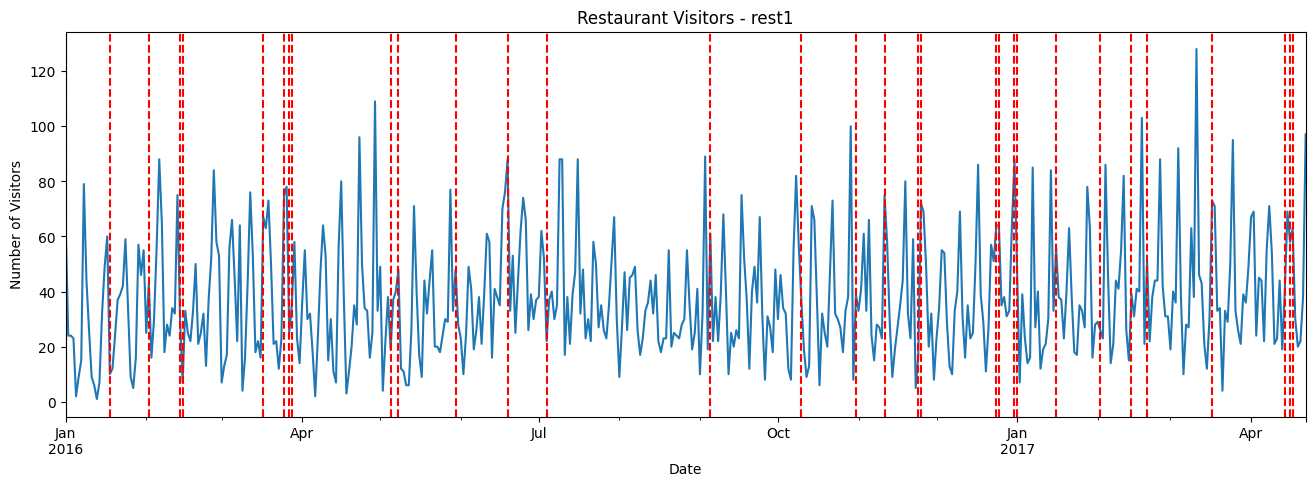

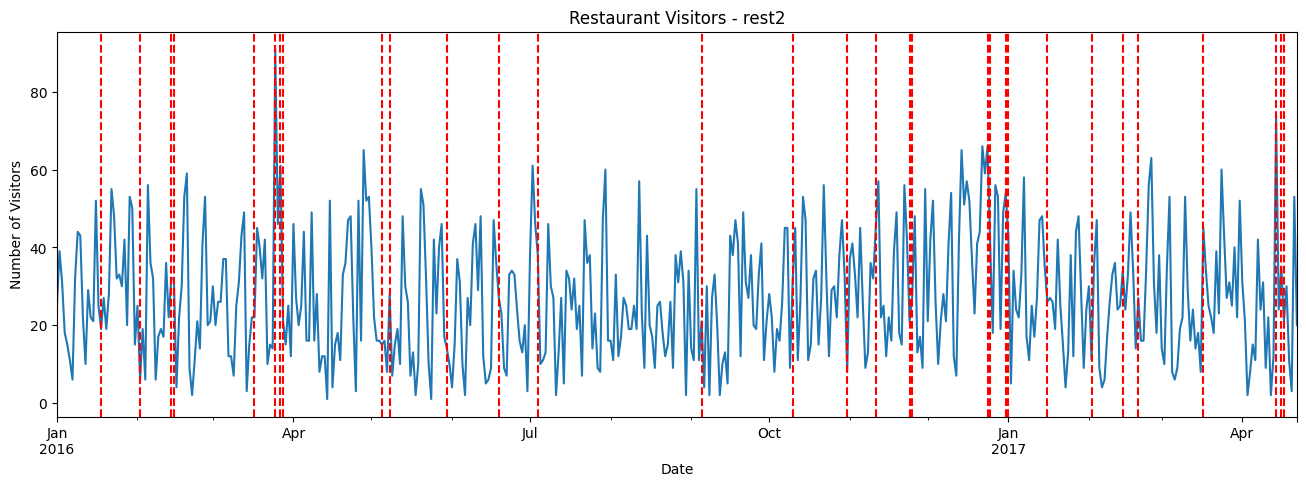

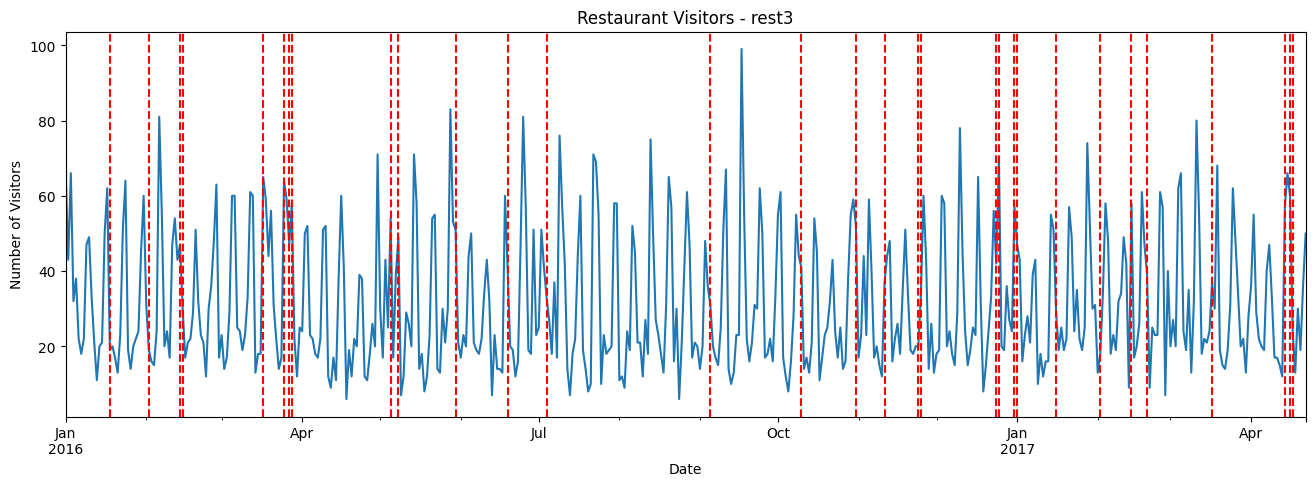

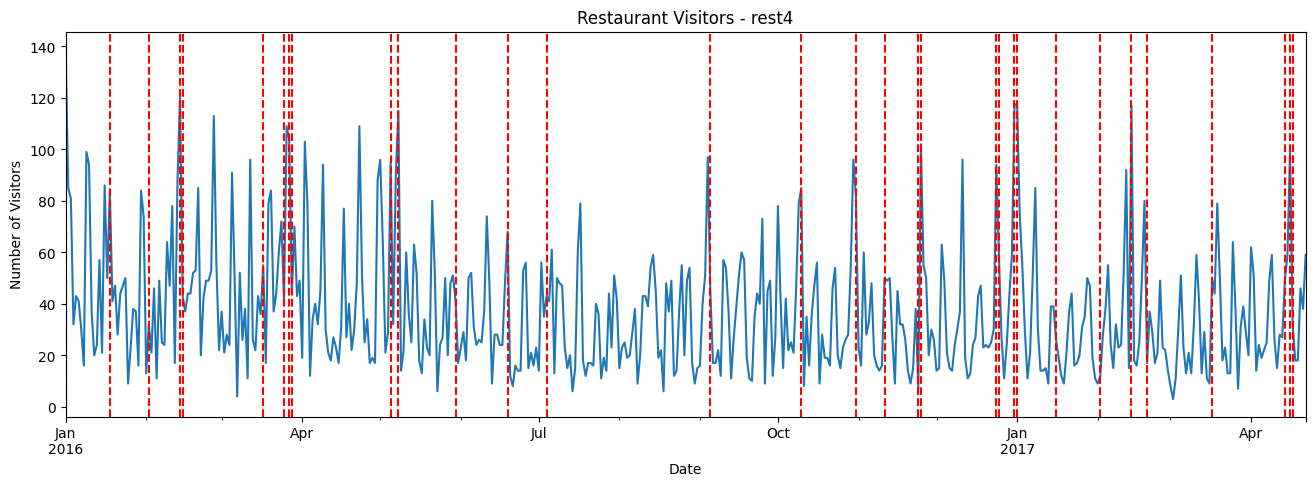

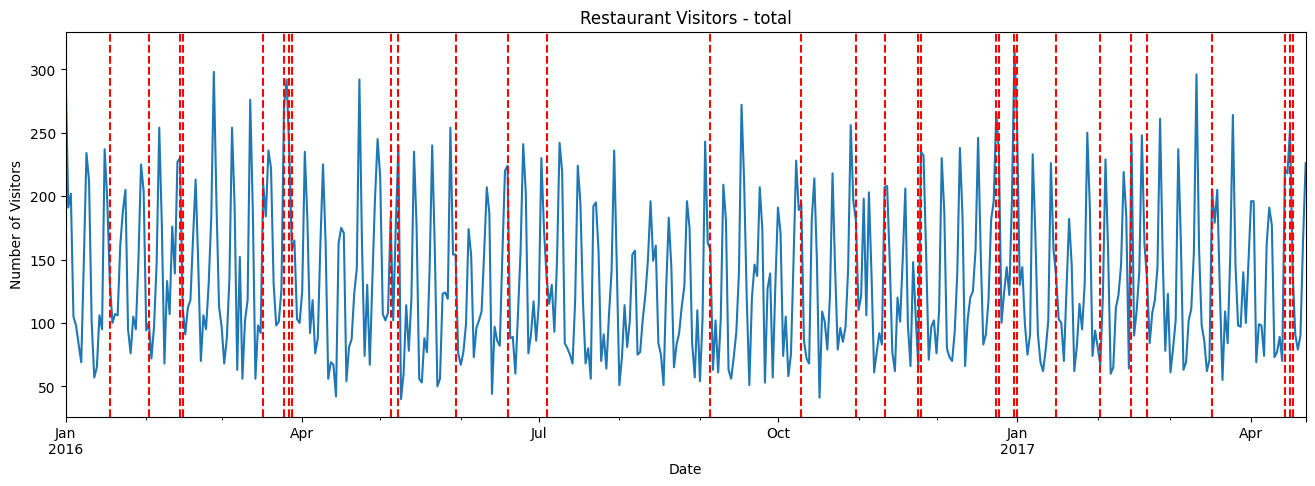

In [309]:
for col in columns:
    ax = df[col].plot(figsize=(16, 5), title=f"Restaurant Visitors - {col}")
    for x in df.query('holiday == 1').index:
        ax.axvline(x=x, color='r', linestyle='--')
    ax.set_xlabel("Date")
    ax.set_ylabel("Number of Visitors")
    plt.show()

In [310]:
from statsmodels.tsa.seasonal import seasonal_decompose

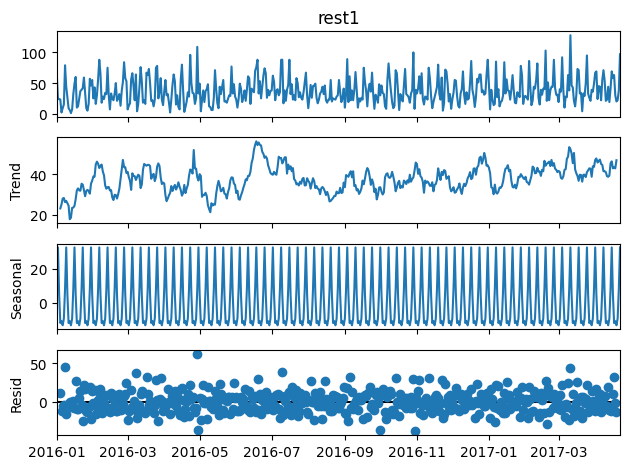

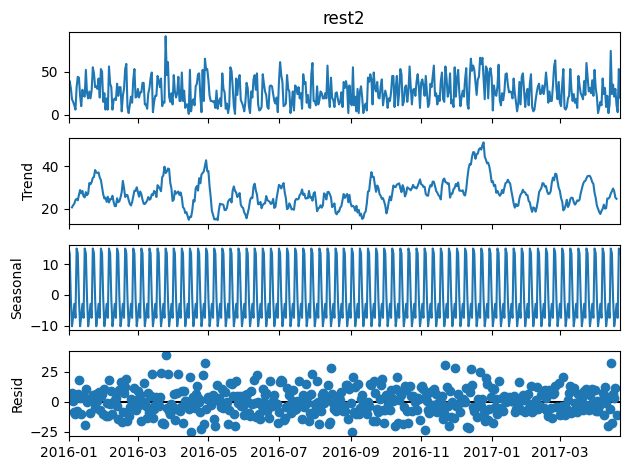

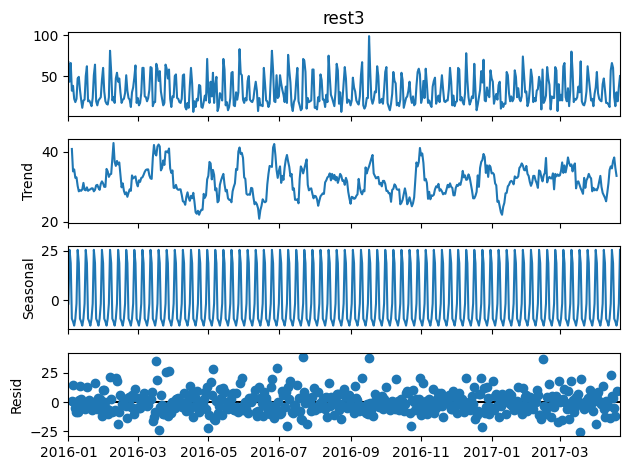

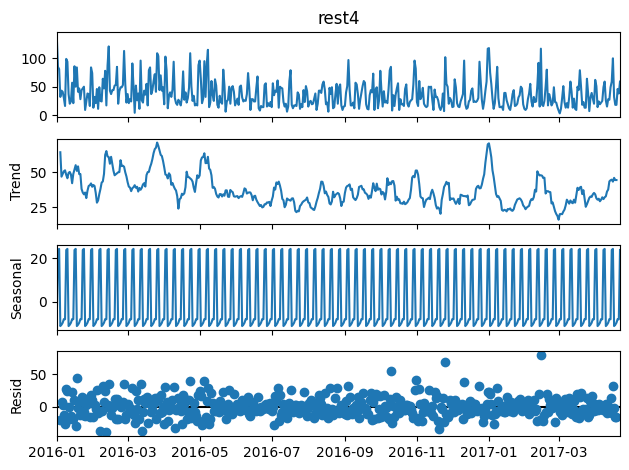

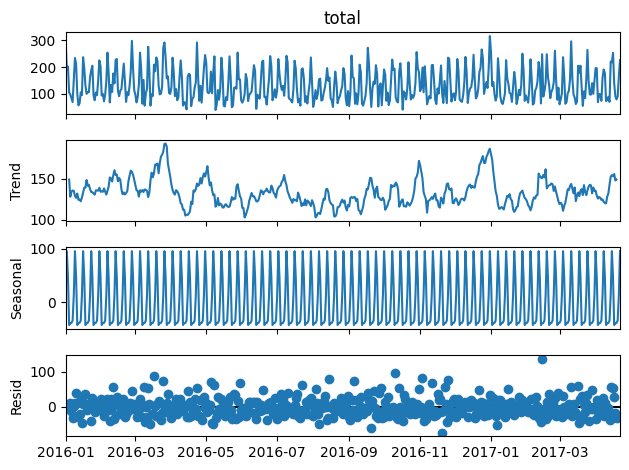

In [311]:
for col in columns:
    res = seasonal_decompose(df[col], model='additive')
    res.plot()

In [312]:
from pmdarima import auto_arima

In [313]:
for col in columns:
    print(col)
    auto_arima(df[col], seasonal=True, m=7, trace=True)

rest1
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4498.869, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4282.164, Time=0.45 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4496.872, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=4459.994, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=4233.491, Time=0.37 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=4124.750, Time=0.40 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=4354.529, Time=0.16 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=4324.385, Time=0.33 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=4288.103, Time=0.25 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=

- best model rest1 = (1,1,1)(1,0,1)[7]
- best model rest2 = (1,0,0)(1,0,1)[7]
- best model rest3 = (2,0,2)(2,0,2)[7]
- best model rest4 = (0,1,4)(1,0,1)[7]
- best model total = (0,0,0)(1,0,1)[7]

In [314]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [315]:
len(train)

466

In [316]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [317]:
model_rest1 = SARIMAX(train['rest1'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 7)).fit()
model_rest2 = SARIMAX(train['rest2'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 7)).fit()
model_rest3 = SARIMAX(train['rest3'], order=(2, 0, 2), seasonal_order=(2, 0, 2, 7)).fit()
model_rest4 = SARIMAX(train['rest4'], order=(0, 1, 4), seasonal_order=(1, 0, 1, 7)).fit()
model_total = SARIMAX(train['total'], order=(0, 0, 0), seasonal_order=(1, 0, 1, 7)).fit()

D:\TSA_labs\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\TSA_labs\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\TSA_labs\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


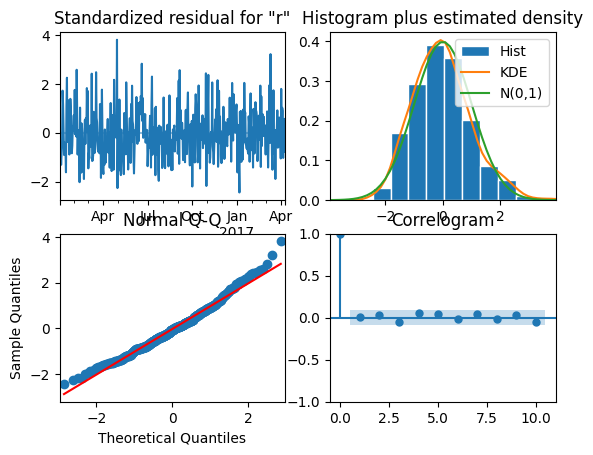

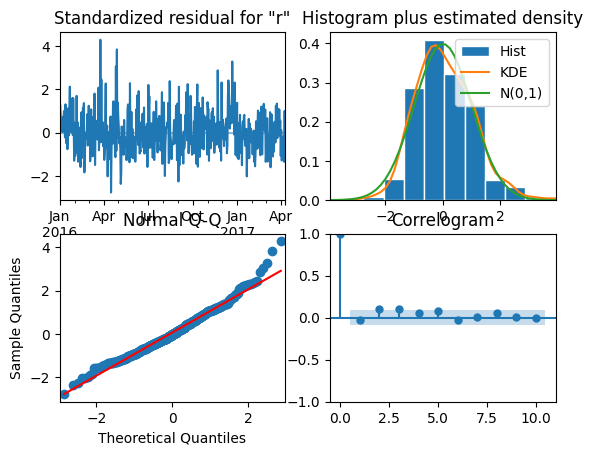

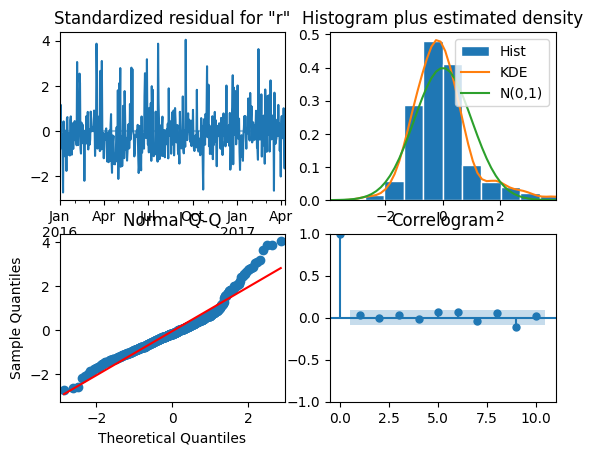

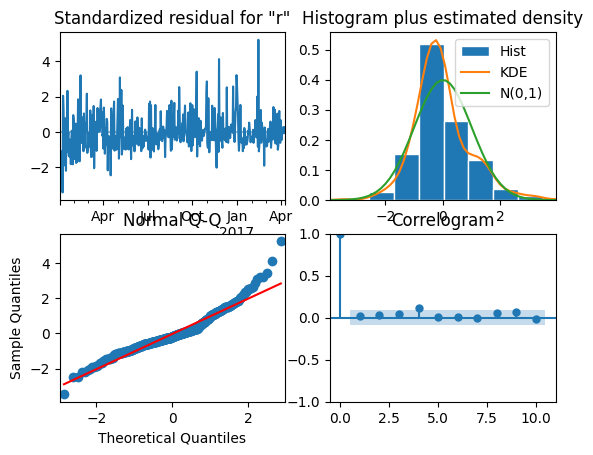

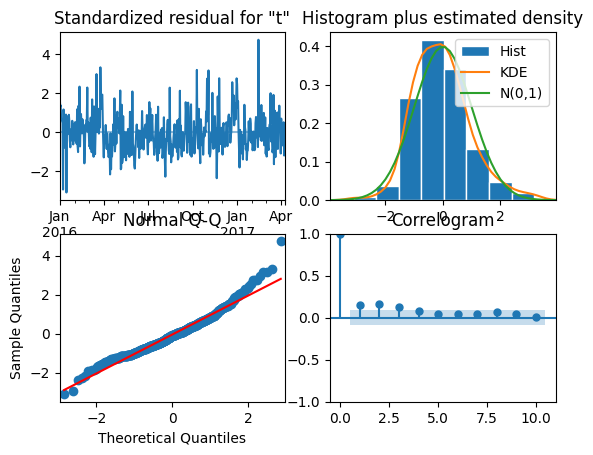

In [318]:
model_rest1.plot_diagnostics();
model_rest2.plot_diagnostics();
model_rest3.plot_diagnostics();
model_rest4.plot_diagnostics();
model_total.plot_diagnostics();

In [319]:
start = len(train)
end = start + len(test) - 1


In [320]:

predictions_rest1 = model_rest1.predict(start=start, end=end).rename("SARIMAX-rest1")
predictions_rest2 = model_rest2.predict(start=start, end=end).rename("SARIMAX-rest2")
predictions_rest3 = model_rest3.predict(start=start, end=end).rename("SARIMAX-rest3")
predictions_rest4 = model_rest4.predict(start=start, end=end).rename("SARIMAX-rest4")
predictions_total = model_total.predict(start=start, end=end).rename("SARIMAX-total")

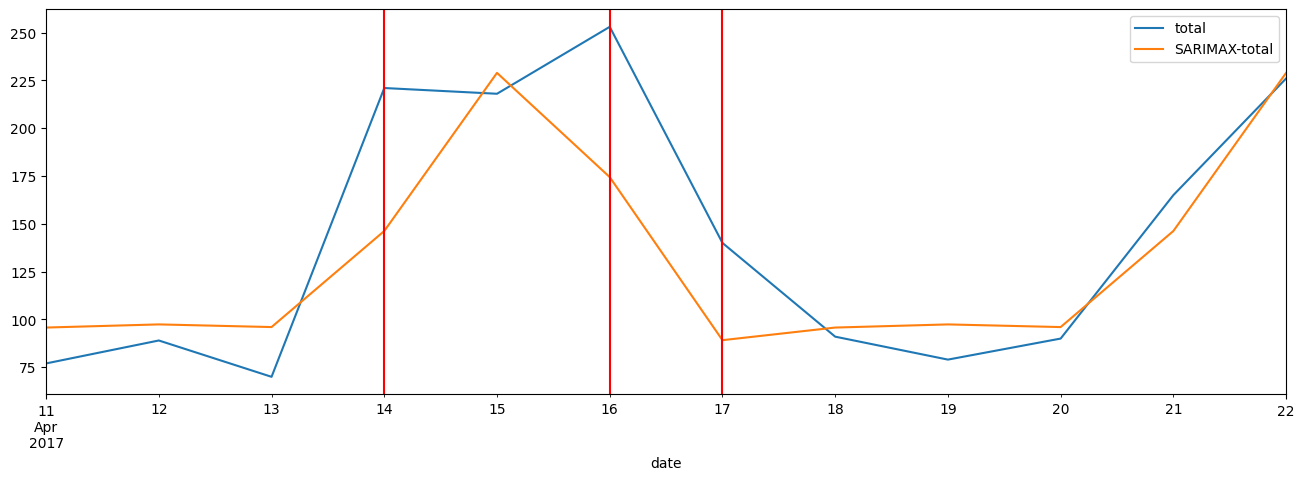

In [321]:
ax = test['total'].plot(figsize=(16, 5), legend=True)
predictions_total.plot(legend=True)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='r')


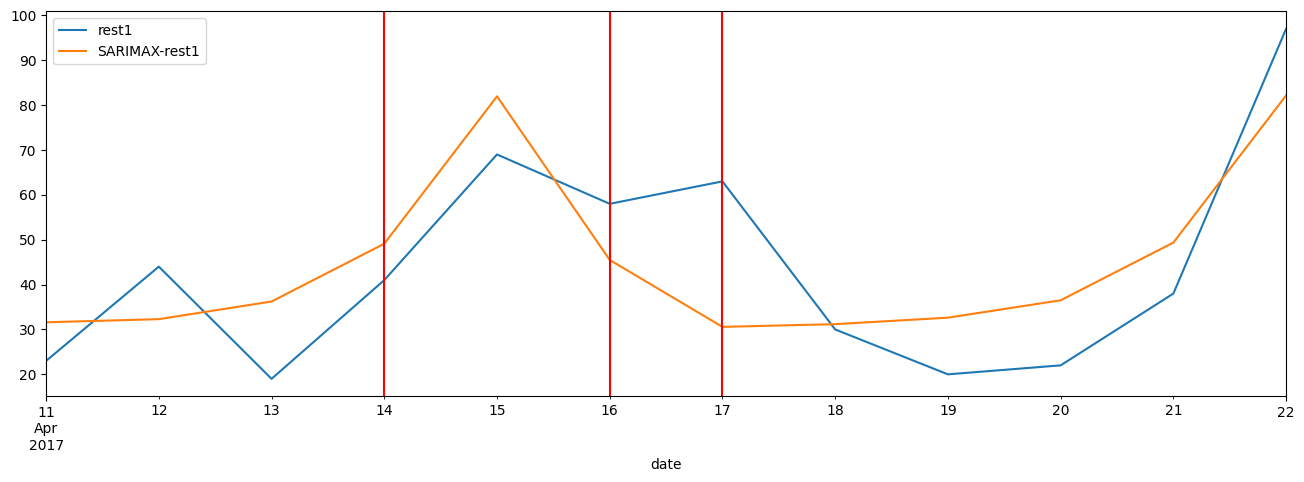

In [322]:
ax = test['rest1'].plot(figsize=(16, 5), legend=True)
predictions_rest1.plot(legend=True)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='r')

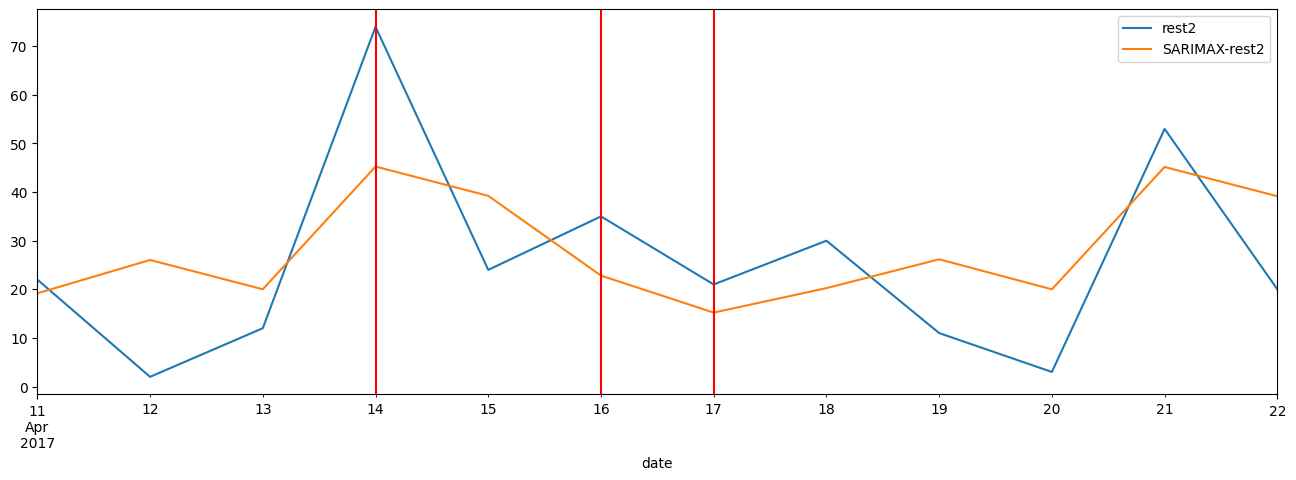

In [323]:
ax = test['rest2'].plot(figsize=(16, 5), legend=True)
predictions_rest2.plot(legend=True)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='r')

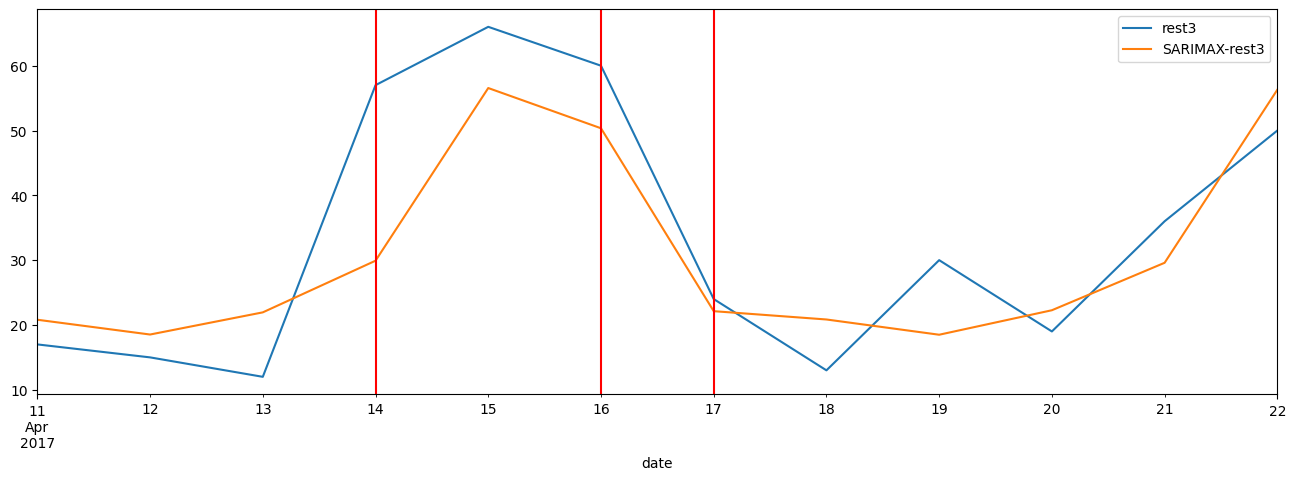

In [324]:
ax = test['rest3'].plot(figsize=(16, 5), legend=True)
predictions_rest3.plot(legend=True)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='r')

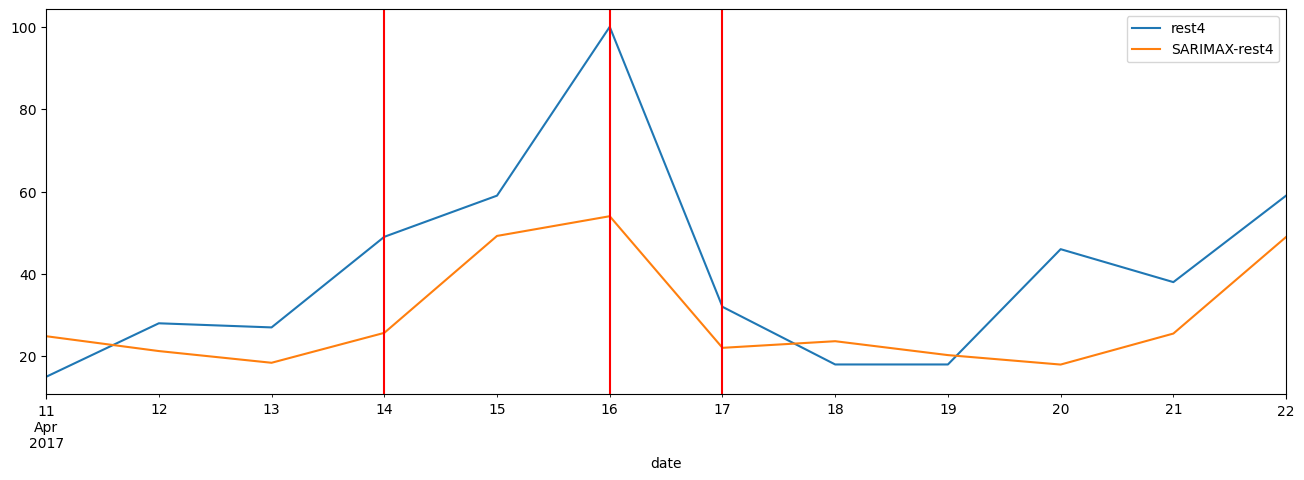

In [325]:
ax = test['rest4'].plot(figsize=(16, 5), legend=True)
predictions_rest4.plot(legend=True)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='r')

In [326]:
from sklearn.metrics import mean_absolute_percentage_error

In [327]:

MAPE_rest1 = mean_absolute_percentage_error(test['rest1'], predictions_rest1) * 100
MAPE_rest2 = mean_absolute_percentage_error(test['rest2'], predictions_rest2) * 100
MAPE_rest3 = mean_absolute_percentage_error(test['rest3'], predictions_rest3) * 100
MAPE_rest4 = mean_absolute_percentage_error(test['rest4'], predictions_rest4) * 100
MAPE_total = mean_absolute_percentage_error(test['total'], predictions_total) * 100

mape_values = {
    'Mean Absolute Percentage Error (%) with holidays': [
        MAPE_rest1,
        MAPE_rest2,
        MAPE_rest3,
        MAPE_rest4,
        MAPE_total
    ]
}

index_labels = ['SARIMAX-rest1', 'SARIMAX-rest2', 'SARIMAX-rest3', 'SARIMAX-rest4', 'SARIMAX-total']

mape_table = pd.DataFrame(mape_values, index=index_labels)

mape_table


,Mean Absolute Percentage Error (%) with holidays
SARIMAX-rest1,37.040798
SARIMAX-rest2,191.139600
SARIMAX-rest3,30.067448
SARIMAX-rest4,34.813864
SARIMAX-total,18.754528


In [328]:
model_rest1_exog = SARIMAX(train['rest1'],exog=train['holiday'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 7)).fit()
model_rest2_exog = SARIMAX(train['rest2'],exog=train['holiday'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 7)).fit()
model_rest3_exog = SARIMAX(train['rest3'],exog=train['holiday'], order=(2, 0, 2), seasonal_order=(2, 0, 2, 7)).fit()
model_rest4_exog = SARIMAX(train['rest4'],exog=train['holiday'], order=(0, 1, 4), seasonal_order=(1, 0, 1, 7)).fit()
model_total_exog = SARIMAX(train['total'],exog=train['holiday'], order=(0, 0, 0), seasonal_order=(1, 0, 1, 7)).fit()

D:\TSA_labs\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\TSA_labs\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [329]:
predictions_rest1_exog = model_rest1_exog.predict(start=start,exog=test['holiday'],end=end).rename("SARIMAX-rest1-exog")
predictions_rest2_exog = model_rest2_exog.predict(start=start,exog=test['holiday'], end=end).rename("SARIMAX-rest2-exog")
predictions_rest3_exog = model_rest3_exog.predict(start=start,exog=test['holiday'], end=end).rename("SARIMAX-rest3-exog")
predictions_rest4_exog = model_rest4_exog.predict(start=start,exog=test['holiday'], end=end).rename("SARIMAX-rest4-exog")
predictions_total_exog = model_total_exog.predict(start=start,exog=test['holiday'], end=end).rename("SARIMAX-total-exog")

In [330]:
MAPE_rest1_exog = mean_absolute_percentage_error(test['rest1'], predictions_rest1_exog) * 100
MAPE_rest2_exog = mean_absolute_percentage_error(test['rest2'], predictions_rest2_exog) * 100
MAPE_rest3_exog = mean_absolute_percentage_error(test['rest3'], predictions_rest3_exog) * 100
MAPE_rest4_exog = mean_absolute_percentage_error(test['rest4'], predictions_rest4_exog) * 100
MAPE_total_exog = mean_absolute_percentage_error(test['total'], predictions_total_exog) * 100

In [331]:
mape_values_exog = {
    'Mean Absolute Percentage Error (%) without holidays': [
        MAPE_rest1_exog,
        MAPE_rest2_exog,
        MAPE_rest3_exog,
        MAPE_rest4_exog,
        MAPE_total_exog
    ]
}

index_labels_exog = ['SARIMAX-rest1-exog', 'SARIMAX-rest2-exog', 'SARIMAX-rest3-exog', 'SARIMAX-rest4-exog', 'SARIMAX-total-exog']

mape_table_exog = pd.DataFrame(mape_values_exog, index=index_labels)

mape_table_exog

,Mean Absolute Percentage Error (%) without holidays
SARIMAX-rest1,31.642156
SARIMAX-rest2,186.741993
SARIMAX-rest3,91.723958
SARIMAX-rest4,33.146824
SARIMAX-total,10.462214


In [332]:
values = {
    'MAPE(%) with holidays': [
        MAPE_rest1,
        MAPE_rest2,
        MAPE_rest3,
        MAPE_rest4,
        MAPE_total],
    'MAPE(%) without holidays': [
        MAPE_rest1_exog,
        MAPE_rest2_exog,
        MAPE_rest3_exog,
        MAPE_rest4_exog,
        MAPE_total_exog
    ]
}

indexes = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

table = pd.DataFrame(values, index=indexes)

table

,MAPE(%) with holidays,MAPE(%) without holidays
rest1,37.040798,31.642156
rest2,191.139600,186.741993
rest3,30.067448,91.723958
rest4,34.813864,33.146824
total,18.754528,10.462214
